In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from cgmzscore.src.main import z_score_wfh, z_score_lhfa
from sklearn.metrics import classification_report

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [163]:
!pwd

/mnt/batch/tasks/shared/LS_root/mounts/clusters/pksingh1/code/Users/pksingh/bias_result_analysis


In [4]:
test_data = pd.read_csv('q4-depthmap-plaincnn-height_1669110716_ae0979c7_all.csv')
# test_data_add = pd.read_csv('q4-depthmap-plaincnn-height-2022_1669804527_ca83c739_all_data_part2.csv',index_col=False)
# test_data = test_data.iloc[: , 1:]
# test_data_add = test_data_add.iloc[:,1:]
print(len(test_data))
# print(len(test_data_add))
# total_data = pd.concat([test_data,test_data_add])
# print(len(total_data))
# test_results =pd.read_csv('q4-depthmap-plaincnn-height_1668752655_b48b6233_test.csv',index_col=False)
# test_results = test_results.iloc[: , 1:]
# test_data_add


189611


In [115]:
test_data.head()

,scan_id,age,sex,scan_step,depth_artifact_id,person_id,height,prediction_height,file_path,timestamp,...,artifact_id,device_model,description,pose_score,pose_workflow,pose_results,ord,no_of_person,zscore_lhfa,diagnosis_lhfa
0,9929ccc0-bde4-11ed-8a41-831d357776db,837,female,102,9929ccc4-bde4-11ed-8a41-fbc4fa001cdc,986b10a0-bde4-11ed-8a41-bf9971bab2fb,86.0,83.45982,1678302477500/aafa03cf-ef2f-4749-b635-6a934226...,2023-03-08-19-07-57-509687,...,9929ccc4-bde4-11ed-8a41-fbc4fa001cdc,HUAWEI VOG-L29,Test,0.848910,b04da320-42b3-11ec-9e50-0b91a7b6eecf,"{'bbox_coordinates': [(391.114, 59.477055), (7...",1,1,-0.79,Not Stunted
1,9929ccc0-bde4-11ed-8a41-831d357776db,837,female,102,9929ccc1-bde4-11ed-8a41-c72ffd5f6d10,986b10a0-bde4-11ed-8a41-bf9971bab2fb,86.0,84.49662,1678302477187/716155c6-1db2-4577-ad21-073d703d...,2023-03-08-19-07-57-197184,...,9929ccc1-bde4-11ed-8a41-c72ffd5f6d10,HUAWEI VOG-L29,Test,0.868541,b04da320-42b3-11ec-9e50-0b91a7b6eecf,"{'bbox_coordinates': [(443.69577, 120.54117), ...",7,1,-0.79,Not Stunted
2,9929ccc0-bde4-11ed-8a41-831d357776db,837,female,102,992b5361-bde4-11ed-8a41-ff04b4b8fff3,986b10a0-bde4-11ed-8a41-bf9971bab2fb,86.0,85.38799,1678302477846/031ff649-4eca-44c6-ad03-8d2034d7...,2023-03-08-19-07-57-853428,...,992b5361-bde4-11ed-8a41-ff04b4b8fff3,HUAWEI VOG-L29,Test,0.883998,b04da320-42b3-11ec-9e50-0b91a7b6eecf,"{'bbox_coordinates': [(407.40277, 119.16715), ...",4,1,-0.79,Not Stunted
3,9929ccc0-bde4-11ed-8a41-831d357776db,837,female,102,992b5362-bde4-11ed-8a41-63768e39ae13,986b10a0-bde4-11ed-8a41-bf9971bab2fb,86.0,84.11423,1678302477958/a064a53e-93ec-4164-83da-e7bda7be...,2023-03-08-19-07-57-962779,...,992b5362-bde4-11ed-8a41-63768e39ae13,HUAWEI VOG-L29,Test,0.857054,b04da320-42b3-11ec-9e50-0b91a7b6eecf,"{'bbox_coordinates': [(423.80917, 131.90997), ...",5,1,-0.79,Not Stunted
4,9929ccc0-bde4-11ed-8a41-831d357776db,837,female,102,9929ccc2-bde4-11ed-8a41-9fa20549ed32,986b10a0-bde4-11ed-8a41-bf9971bab2fb,86.0,84.58662,1678302477299/a0663c27-ab21-499d-946e-01df347a...,2023-03-08-19-07-57-306511,...,9929ccc2-bde4-11ed-8a41-9fa20549ed32,HUAWEI VOG-L29,Test,0.868260,b04da320-42b3-11ec-9e50-0b91a7b6eecf,"{'bbox_coordinates': [(444.9188, 167.14476), (...",8,1,-0.79,Not Stunted


In [116]:
def abs_height_error(rows):
    error = abs(rows['height'] - rows['prediction_height'])
    return error
height_prediction = test_data.drop_duplicates(subset='depth_artifact_id', keep="first")
print("Number of artifacts:", len(height_prediction))
print("Number of scans:",len(pd.unique(height_prediction['scan_id'])))
height_prediction['height_error'] =  height_prediction.apply(abs_height_error,axis=1)
height_prediction.head()

Number of artifacts: 189611
Number of scans: 13136


,scan_id,age,sex,scan_step,depth_artifact_id,person_id,height,prediction_height,file_path,timestamp,...,device_model,description,pose_score,pose_workflow,pose_results,ord,no_of_person,zscore_lhfa,diagnosis_lhfa,height_error
0,9929ccc0-bde4-11ed-8a41-831d357776db,837,female,102,9929ccc4-bde4-11ed-8a41-fbc4fa001cdc,986b10a0-bde4-11ed-8a41-bf9971bab2fb,86.0,83.45982,1678302477500/aafa03cf-ef2f-4749-b635-6a934226...,2023-03-08-19-07-57-509687,...,HUAWEI VOG-L29,Test,0.848910,b04da320-42b3-11ec-9e50-0b91a7b6eecf,"{'bbox_coordinates': [(391.114, 59.477055), (7...",1,1,-0.79,Not Stunted,2.54018
1,9929ccc0-bde4-11ed-8a41-831d357776db,837,female,102,9929ccc1-bde4-11ed-8a41-c72ffd5f6d10,986b10a0-bde4-11ed-8a41-bf9971bab2fb,86.0,84.49662,1678302477187/716155c6-1db2-4577-ad21-073d703d...,2023-03-08-19-07-57-197184,...,HUAWEI VOG-L29,Test,0.868541,b04da320-42b3-11ec-9e50-0b91a7b6eecf,"{'bbox_coordinates': [(443.69577, 120.54117), ...",7,1,-0.79,Not Stunted,1.50338
2,9929ccc0-bde4-11ed-8a41-831d357776db,837,female,102,992b5361-bde4-11ed-8a41-ff04b4b8fff3,986b10a0-bde4-11ed-8a41-bf9971bab2fb,86.0,85.38799,1678302477846/031ff649-4eca-44c6-ad03-8d2034d7...,2023-03-08-19-07-57-853428,...,HUAWEI VOG-L29,Test,0.883998,b04da320-42b3-11ec-9e50-0b91a7b6eecf,"{'bbox_coordinates': [(407.40277, 119.16715), ...",4,1,-0.79,Not Stunted,0.61201
3,9929ccc0-bde4-11ed-8a41-831d357776db,837,female,102,992b5362-bde4-11ed-8a41-63768e39ae13,986b10a0-bde4-11ed-8a41-bf9971bab2fb,86.0,84.11423,1678302477958/a064a53e-93ec-4164-83da-e7bda7be...,2023-03-08-19-07-57-962779,...,HUAWEI VOG-L29,Test,0.857054,b04da320-42b3-11ec-9e50-0b91a7b6eecf,"{'bbox_coordinates': [(423.80917, 131.90997), ...",5,1,-0.79,Not Stunted,1.88577
4,9929ccc0-bde4-11ed-8a41-831d357776db,837,female,102,9929ccc2-bde4-11ed-8a41-9fa20549ed32,986b10a0-bde4-11ed-8a41-bf9971bab2fb,86.0,84.58662,1678302477299/a0663c27-ab21-499d-946e-01df347a...,2023-03-08-19-07-57-306511,...,HUAWEI VOG-L29,Test,0.868260,b04da320-42b3-11ec-9e50-0b91a7b6eecf,"{'bbox_coordinates': [(444.9188, 167.14476), (...",8,1,-0.79,Not Stunted,1.41338


In [117]:
print("Average mae for artifacts:",height_prediction['height_error'].sum()/len(height_prediction))
f = {'sex': 'first','height':'mean','prediction_height':'mean','age':'first','diagnosis_lhfa':'first','height_error':'mean'}
scan_level_data = height_prediction.groupby(['scan_id']).agg(f)
# scan_level_data.head()
print("Average mae for scans:",scan_level_data['height_error'].sum()/len(scan_level_data))
# print("Average mae for scans:",)

Average mae for artifacts: 1.7257785781732071
Average mae for scans: 1.7354576307913037


In [118]:
age_gt_two = height_prediction[height_prediction['age']>=730]
age_lt_two = height_prediction[height_prediction['age']<730]
scan_gt2 = scan_level_data[scan_level_data['age']>=730]
scan_lt2 = scan_level_data[scan_level_data['age']<730]
print("Number of scans for age less than 2:", len(pd.unique(age_lt_two['scan_id'])))
print("Number of scans for age more than 2:", len(pd.unique(age_gt_two['scan_id'])))

Number of scans for age less than 2: 4466
Number of scans for age more than 2: 8670


In [119]:
print("Average mae for artifacts for gt2:",age_gt_two['height_error'].sum()/len(age_gt_two))
f = {'sex': 'first','height':'mean','prediction_height':'mean','age':'first','diagnosis_lhfa':'first','height_error':'mean'}
scan_level_data_gt2 = age_gt_two.groupby(['scan_id']).agg(f)
# scan_level_data.head()
print("Average mae for scans:",scan_gt2['height_error'].sum()/len(scan_gt2))
# print("Average mae for scans:",)

Average mae for artifacts for gt2: 1.437312216775856
Average mae for scans: 1.4277652849331541


In [147]:
# age_gt_two = height_prediction[height_prediction['age']>=730]
def remove_outliers(x):
    q1 = np.percentile(x, 25)
    q3 = np.percentile(x, 75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    return [v for v in x if lower <= v <= upper]


grouped_gt2 = age_gt_two.groupby('scan_id')['height_error'].agg(list).reset_index()
grouped_gt2 = grouped_gt2.rename(columns={'height_error': 'scan_errors'})
grouped_gt2['scan_errors'] = grouped_gt2['scan_errors'].apply(remove_outliers)
grouped_gt2[['mean_height_error']] = grouped_gt2['scan_errors'].apply(lambda x: pd.Series([np.mean(x)]))
grouped_gt2

,scan_id,scan_errors,mean_height_error
0,000e9fa0-bee5-11ed-8a41-1f4fa247c8f0,"[0.5398399999999981, 0.5247699999999895, 0.245...",0.609257
1,0017a2c0-be55-11ed-8a41-ebaf954e8f78,"[0.27401600000000315, 0.52346, 0.0923599999999...",0.645096
2,001a7c60-be6a-11ed-8a41-97059fae8107,"[0.33004999999999995, 0.7590100000000035, 0.03...",0.525849
3,00206aa0-be7c-11ed-8a41-835ae4ace854,"[0.9732599999999962, 2.3530599999999993, 1.400...",1.361415
4,002c64a0-be94-11ed-8a41-d74e94b747f5,"[0.5292999999999921, 0.8625459999999947, 2.326...",0.867725
...,...,...,...
8665,ffdfbc20-be4f-11ed-8a41-8fe630d89b1c,"[3.4837200000000053, 2.702219999999997, 3.3232...",3.521597
8666,ffe0f6a0-be39-11ed-8a41-8bf3efd8e371,"[1.0872899999999959, 0.2439499999999981, 0.047...",0.853275
8667,ffe51160-c012-11ed-8a41-dfa1ab3d3394,"[1.4917760000000015, 1.1158499999999947, 1.056...",0.965780
8668,ffe93500-be2e-11ed-8a41-2b7815015a65,"[8.438065999999992, 7.7174499999999995, 7.7864...",7.801543


In [148]:
scan_dataframe_gt2 = pd.merge(scan_level_data_gt2, grouped_gt2,  how='left', left_on=['scan_id'], right_on = ['scan_id'],suffixes=('', '_DROP')).filter(regex='^(?!.*_DROP)')
scan_dataframe_gt2

,scan_id,sex,height,prediction_height,age,diagnosis_lhfa,height_error,prediction_zscore_lhfa,prediction_diagnosis_lhfa,scan_errors,mean_height_error
0,000e9fa0-bee5-11ed-8a41-1f4fa247c8f0,male,92.0,91.645163,1065,Not Stunted,0.609257,-1.03,Not Stunted,"[0.5398399999999981, 0.5247699999999895, 0.245...",0.609257
1,0017a2c0-be55-11ed-8a41-ebaf954e8f78,female,92.9,93.092876,1359,Not Stunted,0.692434,-1.82,Not Stunted,"[0.27401600000000315, 0.52346, 0.0923599999999...",0.645096
2,001a7c60-be6a-11ed-8a41-97059fae8107,male,84.2,83.929715,1155,Severely Stunted,0.571008,-3.53,Severely Stunted,"[0.33004999999999995, 0.7590100000000035, 0.03...",0.525849
3,00206aa0-be7c-11ed-8a41-835ae4ace854,male,95.7,94.083259,1416,Not Stunted,1.645668,-2.03,Moderately Stunted,"[0.9732599999999962, 2.3530599999999993, 1.400...",1.361415
4,002c64a0-be94-11ed-8a41-d74e94b747f5,male,93.8,93.420850,1821,Severely Stunted,0.867725,-3.55,Severely Stunted,"[0.5292999999999921, 0.8625459999999947, 2.326...",0.867725
...,...,...,...,...,...,...,...,...,...,...,...
8665,ffdfbc20-be4f-11ed-8a41-8fe630d89b1c,female,80.2,76.678403,905,Moderately Stunted,3.521597,-3.92,Severely Stunted,"[3.4837200000000053, 2.702219999999997, 3.3232...",3.521597
8666,ffe0f6a0-be39-11ed-8a41-8bf3efd8e371,male,90.0,89.339652,1127,Not Stunted,0.853275,-1.97,Not Stunted,"[1.0872899999999959, 0.2439499999999981, 0.047...",0.853275
8667,ffe51160-c012-11ed-8a41-dfa1ab3d3394,female,81.5,82.095560,1020,Severely Stunted,0.965780,-3.03,Severely Stunted,"[1.4917760000000015, 1.1158499999999947, 1.056...",0.965780
8668,ffe93500-be2e-11ed-8a41-2b7815015a65,female,94.1,86.298457,1394,Not Stunted,7.801543,-3.58,Severely Stunted,"[8.438065999999992, 7.7174499999999995, 7.7864...",7.801543


In [ ]:
THRESHOLD =1.2


In [150]:
gs_data = scan_dataframe_gt2[scan_dataframe_gt2['mean_height_error']<=THRESHOLD]
print(f"Gold standard accuracy for {THRESHOLD}:",len(gs_data)/len(scan_dataframe_gt2))
# gs_data_gt2 = scan_level_data_gt2[scan_level_data_gt2['height_error']<=THRESHOLD]
# print(f"Gold standard accuracy for {THRESHOLD} gt2 :",len(gs_data_gt2)/len(scan_level_data_gt2))
# gs_data_lt2 = scan_lt2[scan_lt2['height_error']<=THRESHOLD]
# print(f"Gold standard accuracy for {THRESHOLD} lt2 :",len(gs_data_lt2)/len(scan_lt2))

Gold standard accuracy for 1.2: 0.6416378316032295


In [120]:
print("Data for age more than 2:")
front_scan_gt2 = age_gt_two[age_gt_two['scan_step']==100]
back_scan_gt2 = age_gt_two[age_gt_two['scan_step']==102]
scan_360_gt2 = age_gt_two[age_gt_two['scan_step']==101]
print("Number of scans for 100:", len(pd.unique(front_scan_gt2['scan_id'])))
print("Number of scans for 102:", len(pd.unique(back_scan_gt2['scan_id'])))
print("Number of scans for 101:", len(pd.unique(scan_360_gt2['scan_id'])))
print('-'*50)
print("Data for age less than 2")
front_scan_lt2 = age_lt_two[age_lt_two['scan_step']==100]
back_scan_lt2 = age_lt_two[age_lt_two['scan_step']==102]
scan_360_lt2 = age_lt_two[age_lt_two['scan_step']==101]
laying_front_scan_lt2 = age_lt_two[age_lt_two['scan_step']==200]
laying_back_scan_lt2 = age_lt_two[age_lt_two['scan_step']==202]
laying_scan_360_lt2 = age_lt_two[age_lt_two['scan_step']==201]
print("Number of scans for 100:", len(pd.unique(front_scan_lt2['scan_id'])))
print("Number of scans for 102:", len(pd.unique(back_scan_lt2['scan_id'])))
print("Number of scans for 101:", len(pd.unique(scan_360_lt2['scan_id'])))
print("Number of scans for 200:", len(pd.unique(laying_front_scan_lt2['scan_id'])))
print("Number of scans for 202:", len(pd.unique(laying_back_scan_lt2['scan_id'])))
print("Number of scans for 201:", len(pd.unique(laying_scan_360_lt2['scan_id'])))

Data for age more than 2:
Number of scans for 100: 2868
Number of scans for 102: 2850
Number of scans for 101: 2821
--------------------------------------------------
Data for age less than 2
Number of scans for 100: 524
Number of scans for 102: 505
Number of scans for 101: 494
Number of scans for 200: 1012
Number of scans for 202: 994
Number of scans for 201: 937


In [121]:
scan_level_data_100_gt2 = front_scan_gt2.groupby(['scan_id','scan_step']).mean()
print("Average mae for scans 100 gt 2:",scan_level_data_100_gt2['height_error'].sum()/len(scan_level_data_100_gt2))
scan_level_data_101_gt2 = scan_360_gt2.groupby(['scan_id','scan_step']).mean()
print("Average mae for scans 101 gt 2:",scan_level_data_101_gt2['height_error'].sum()/len(scan_level_data_101_gt2))
scan_level_data_102_gt2= back_scan_gt2.groupby(['scan_id','scan_step']).mean()
print("Average mae for scans 102 gt 2:",scan_level_data_102_gt2['height_error'].sum()/len(scan_level_data_102_gt2))

print('-'*50)
print("MAE for less than 2:")

scan_level_data_100_lt2 = front_scan_lt2.groupby(['scan_id','scan_step']).mean()
print("Average mae for scans 100 lt 2:",scan_level_data_100_lt2['height_error'].sum()/len(scan_level_data_100_lt2))
scan_level_data_101_lt2 = scan_360_lt2.groupby(['scan_id','scan_step']).mean()
print("Average mae for scans 101 lt 2:",scan_level_data_101_lt2['height_error'].sum()/len(scan_level_data_101_lt2))
scan_level_data_102_lt2= back_scan_lt2.groupby(['scan_id','scan_step']).mean()
print("Average mae for scans 102 lt 2:",scan_level_data_102_lt2['height_error'].sum()/len(scan_level_data_102_lt2))
laying_scan_level_data_100_lt2 = laying_front_scan_lt2.groupby(['scan_id','scan_step']).mean()
print("Average mae for laying scans 100 lt 2:",laying_scan_level_data_100_lt2['height_error'].sum()/len(laying_scan_level_data_100_lt2))
laying_scan_level_data_101_lt2 = laying_scan_360_lt2.groupby(['scan_id','scan_step']).mean()
print("Average mae for laying scans 101 lt 2:",laying_scan_level_data_101_lt2['height_error'].sum()/len(laying_scan_level_data_101_lt2))
laying_scan_level_data_102_lt2= laying_back_scan_lt2.groupby(['scan_id','scan_step']).mean()
print("Average mae for laying scans 102 lt 2:",laying_scan_level_data_102_lt2['height_error'].sum()/len(laying_scan_level_data_102_lt2))


Average mae for scans 100 gt 2: 1.334128788614744
Average mae for scans 101 gt 2: 1.4467919471567248
Average mae for scans 102 gt 2: 1.4049480911715886
--------------------------------------------------
MAE for less than 2:
Average mae for scans 100 lt 2: 1.8826780614916543
Average mae for scans 101 lt 2: 2.170155178546508
Average mae for scans 102 lt 2: 2.2069682597257585
Average mae for laying scans 100 lt 2: 2.262058867711759
Average mae for laying scans 101 lt 2: 2.409756220773342
Average mae for laying scans 102 lt 2: 2.7142880594870085


In [122]:
gs_data = scan_level_data[scan_level_data['height_error']<=THRESHOLD]
print(f"Gold standard accuracy for {THRESHOLD}:",len(gs_data)/len(scan_level_data))
gs_data_gt2 = scan_level_data_gt2[scan_level_data_gt2['height_error']<=THRESHOLD]
print(f"Gold standard accuracy for {THRESHOLD} gt2 :",len(gs_data_gt2)/len(scan_level_data_gt2))
gs_data_lt2 = scan_lt2[scan_lt2['height_error']<=THRESHOLD]
print(f"Gold standard accuracy for {THRESHOLD} lt2 :",len(gs_data_lt2)/len(scan_lt2))

Gold standard accuracy for 1.2: 0.504948233861145
Gold standard accuracy for 1.2 gt2 : 0.6234140715109573
Gold standard accuracy for 1.2 lt2 : 0.2749664128974474


In [123]:
print("Average mae for scans gt2 :",scan_gt2['height_error'].sum()/len(scan_gt2))
print("Average mae for scans lt2 :",scan_lt2['height_error'].sum()/len(scan_lt2))

Average mae for scans gt2 : 1.4277652849331541
Average mae for scans lt2 : 2.332791405665947


In [124]:
print(scan_gt2['height_error'].min())
print(scan_gt2['height_error'].max())


0.08435066666666557
33.049188625


In [ ]:
def calculate_lhfa_zscore(rows):
    sex = rows['sex']
    if sex == 'female':
        gender = 'F'
    else:
        gender = 'M'
    age = rows['age']
    height = rows['height']
    score = z_score_lhfa(age_in_days=age, sex=gender, height=height)
    return score
# scan_level_data['zscore_lhfa'] = scan_level_data.apply(calculate_lhfa_zscore,axis =1)

In [ ]:
def calculate_predicted_lhfa_zscore(rows):
    sex = rows['sex']
    if sex == 'female':
        gender = 'F'
    else:
        gender = 'M'
    age = rows['age']
    height = rows['prediction_height']
    score = z_score_lhfa(age_in_days=age, sex=gender, height=height)
    return score

In [ ]:
def diagnosis_on_prediction_lhfa(rows):
    lhfa = rows['prediction_zscore_lhfa']
    if lhfa < -3:
        class_lhfa = 'Severely Stunted'
    elif -3 <= lhfa < -2:
        class_lhfa = 'Moderately Stunted'
    else:
        class_lhfa = 'Not Stunted'
    return class_lhfa

In [ ]:
def diagnosis_on_lhfa(rows):
    lhfa = rows['zscore_lhfa']
    if lhfa < -3:
        class_lhfa = 'Severely Stunted'
    elif -3 <= lhfa < -2:
        class_lhfa = 'Moderately Stunted'
    else:
        class_lhfa = 'Not Stunted'
    return class_lhfa

In [125]:
scan_level_data_gt2.loc[:, 'prediction_zscore_lhfa'] = scan_level_data_gt2.apply(calculate_predicted_lhfa_zscore, axis=1)
# scan_dataframe_gt2.loc[:, 'prediction_zscore_lhfa'] = scan_gt2.apply(calculate_predicted_lhfa_zscore, axis=1)

In [126]:
scan_level_data_gt2['prediction_diagnosis_lhfa'] = scan_level_data_gt2.apply(diagnosis_on_prediction_lhfa,axis =1)
# scan_lt2['prediction_diagnosis_lhfa'] = scan_lt2.apply(diagnosis_on_prediction_lhfa,axis =1)

In [127]:
print(classification_report(scan_level_data_gt2['diagnosis_lhfa'], scan_level_data_gt2['prediction_diagnosis_lhfa']))
# print(classification_report(scan_gt2['diagnosis_lhfa'], scan_gt2['prediction_diagnosis_lhfa']))

                    precision    recall  f1-score   support

Moderately Stunted       0.74      0.77      0.76      2911
       Not Stunted       0.87      0.87      0.87      3915
  Severely Stunted       0.85      0.81      0.83      1844

          accuracy                           0.82      8670
         macro avg       0.82      0.82      0.82      8670
      weighted avg       0.82      0.82      0.82      8670



In [ ]:
print(classification_report(scan_lt2['diagnosis_lhfa'], scan_lt2['prediction_diagnosis_lhfa']))

[898 565 328]
Specificity:
--------------------
Moderate_Stunted: 0.8196424984936734
Healthy: 0.8601138895766279
Stunted: 0.9428172942817294


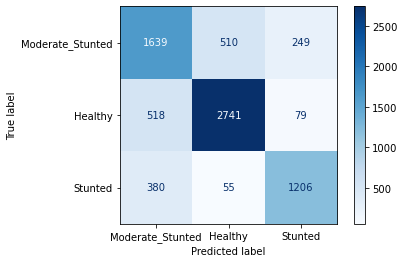

In [30]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(scan_level_data_gt2['diagnosis_lhfa'],scan_level_data_gt2['prediction_diagnosis_lhfa'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['Moderate_Stunted','Healthy','Stunted'])
disp.plot(cmap="Blues", values_format='')
TP = np.diag(cm)
FP = cm.sum(axis=0) - np.diag(cm)
FN = cm.sum(axis=1) - np.diag(cm)
TN = cm.sum() - (FP + FN + TP)
print(FP)

print("Specificity:")
print("-"*20)
print("Moderate_Stunted:",TN[0]/(TN[0]+FP[0]))
print("Healthy:",TN[1]/(TN[1]+FP[1]))
print("Stunted:",TN[2]/(TN[2]+FP[2]))

In [36]:
# print("Number of scans for age more than 2:", len(pd.unique(scan_level_data_gt2['scan_id'])))
print("-"*40)
TP = np.diag(cm)
FP = cm.sum(axis=0) - np.diag(cm)
FN = cm.sum(axis=1) - np.diag(cm)
TN = cm.sum() - (FP + FN + TP)

print("Specificity:")
print("-"*20)
print("Moderate_Stunted:",TN[0]/(TN[0]+FP[0]))
print("Healthy:",TN[1]/(TN[1]+FP[1]))
print("Stunted:",TN[2]/(TN[2]+FP[2]))

print("-"*30)

print("Senstivity:")
print("-"*20)
print("Moderate_Stunted:",TP[0]/(TP[0]+FN[0]))
print("Healthy:",TP[1]/(TP[1]+FN[1]))
print("Stunted:",TP[2]/(TP[2]+FN[2]))

print("-"*30)
print("precision(PPV):")
print("-"*20)
print("Moderate_Stunted:",TP[0]/(TP[0]+FP[0]))
print("Healthy:",TP[1]/(TP[1]+FP[1]))
print("Stunted:",TP[2]/(TP[2]+FP[2]))
print("-"*30)
print("Miss rate:")
print("-"*20)
print("Moderate_Stunted:",FN[0]/(TP[0]+FN[0]))
print("Healthy:",FN[1]/(TP[1]+FN[1]))
print("Stunted:",FN[2]/(TP[2]+FN[2]))
print("-"*30)
print("Miss rate:")
print("-"*20)
print("Moderate_Stunted:",FP[0]/(FP[0]+TN[0]))
print("Healthy:",FP[1]/(FP[1]+TN[1]))
print("Stunted:",FP[2]/(FP[2]+TN[2]))
print("-"*30)
print("false discovery rate:")
print("-"*20)
print("Moderate_Stunted:",FP[0]/(FP[0]+TP[0]))
print("Healthy:",FP[1]/(FP[1]+TP[1]))
print("Stunted:",FP[2]/(FP[2]+TP[2]))
print("-"*30)
print("false omission rate:")
print("-"*20)
print("Moderate_Stunted:",FN[0]/(FN[0]+TN[0]))
print("Healthy:",FN[1]/(FN[1]+TN[1]))
print("Stunted:",FN[2]/(FN[2]+TN[2]))
print("-"*30)
print("positive_likelihood_ratio:")

----------------------------------------
Specificity:
--------------------
Moderate_Stunted: 0.8196424984936734
Healthy: 0.8601138895766279
Stunted: 0.9428172942817294
------------------------------
Senstivity:
--------------------
Moderate_Stunted: 0.6834862385321101
Healthy: 0.8211503894547634
Stunted: 0.7349177330895795
------------------------------
precision(PPV):
--------------------
Moderate_Stunted: 0.6460386283011431
Healthy: 0.8290986085904416
Stunted: 0.7861799217731421
------------------------------
Miss rate:
--------------------
Moderate_Stunted: 0.3165137614678899
Healthy: 0.17884961054523668
Stunted: 0.26508226691042047
------------------------------
Miss rate:
--------------------
Moderate_Stunted: 0.18035750150632657
Healthy: 0.13988611042337212
Stunted: 0.05718270571827057
------------------------------
false discovery rate:
--------------------
Moderate_Stunted: 0.35396137169885694
Healthy: 0.17090139140955837
Stunted: 0.2138200782268579
----------------------------

In [37]:
predicted_prevalence = (TP+FP)/(TP+TN+FN+FP)
print("predicted prevalence :",predicted_prevalence)

predicted_prevalence = (TP+FN)/(TP+TN+FN+FP)
print("actual prevalence :",predicted_prevalence)

predicted prevalence : [0.34390674 0.44814965 0.20794361]
actual prevalence : [0.32506439 0.45248746 0.22244815]


## Metric for pose data

In [38]:
age_gt_two_pose_artifacts = age_gt_two[~age_gt_two['pose_score'].isnull()]
print("Total artifacts with pose:",len(age_gt_two_pose_artifacts))
f = {'sex': 'first','height':'mean','prediction_height':'mean','age':'first','height_error':'mean','diagnosis_lhfa':'first'}
age_gt_two_pose_scans = age_gt_two_pose_artifacts.groupby(['scan_id']).agg(f)
print("Total scans with pose:",len(age_gt_two_pose_scans))


Total artifacts with pose: 21762
Total scans with pose: 2810


In [ ]:
grouped_gt2_pose = age_gt_two_pose_artifacts.groupby('scan_id')['height_error'].agg(list).reset_index()
grouped_gt2_pose = grouped_gt2_pose.rename(columns={'height_error': 'scan_errors'})
grouped_gt2_pose['scan_errors'] = grouped_gt2_pose['scan_errors'].apply(remove_outliers)
grouped_gt2_pose[['mean_height_error']] = grouped_gt2_pose['scan_errors'].apply(lambda x: pd.Series([np.mean(x)]))
grouped_gt2_pose

In [ ]:
scan_dataframe_gt2_pose = pd.merge(age_gt_two_pose_scans, grouped_gt2_pose,  how='left', left_on=['scan_id'], right_on = ['scan_id'],suffixes=('', '_DROP')).filter(regex='^(?!.*_DROP)')


In [89]:
THRESHOLD = 1
print("Average mae for pose_artifacts:",age_gt_two_pose_artifacts['height_error'].sum()/len(age_gt_two_pose_artifacts))
print("Average mae for pose_scans:",age_gt_two_pose_scans['height_error'].sum()/len(age_gt_two_pose_scans))
gs_data_pose = age_gt_two_pose_scans[age_gt_two_pose_scans['height_error']<=THRESHOLD]
age_gt_two_pose_scans['prediction_zscore_lhfa'] = age_gt_two_pose_scans.apply(calculate_predicted_lhfa_zscore,axis =1)
print("Gold standard accuracy for pose scans for 1.2:",len(gs_data_pose)/len(age_gt_two_pose_scans))

Average mae for pose_artifacts: 1.5222133669239957
Average mae for pose_scans: 1.551336024135199
Gold standard accuracy for pose scans for 1.2: 0.4594306049822064


In [46]:
# age_gt_two_pose_scans['prediction_diagnosis_lhfa'] = age_gt_two_pose_scans.apply(diagnosis_on_prediction_lhfa,axis =1)
age_gt_two_pose_scans['prediction_diagnosis_lhfa'] = age_gt_two_pose_scans.apply(diagnosis_on_prediction_lhfa,axis =1)
print(classification_report(age_gt_two_pose_scans['diagnosis_lhfa'], age_gt_two_pose_scans['prediction_diagnosis_lhfa']))

                    precision    recall  f1-score   support

Moderately Stunted       0.67      0.70      0.68       914
       Not Stunted       0.84      0.86      0.85      1337
  Severely Stunted       0.81      0.72      0.76       559

          accuracy                           0.78      2810
         macro avg       0.77      0.76      0.77      2810
      weighted avg       0.78      0.78      0.78      2810



In [ ]:
#################################################

## Pose Filter results

In [156]:
THRESHOLD = .90
age_gt_two_pose_artifacts_filter = age_gt_two_pose_artifacts[(age_gt_two_pose_artifacts['pose_score']>=THRESHOLD)&(age_gt_two_pose_artifacts['no_of_person']==1.0)]
print(f"Total filtered artifacts for {THRESHOLD} pose score:",len(age_gt_two_pose_artifacts_filter))
f = {'sex': 'first','height':'mean','prediction_height':'mean','age':'first','height_error':'mean','diagnosis_lhfa':'first'}
age_gt_two_pose_scans_filter = age_gt_two_pose_artifacts_filter.groupby(['scan_id']).agg(f)
print(f"Total filtered scans for {THRESHOLD} pose score:",len(age_gt_two_pose_scans_filter))

Total filtered artifacts for 0.9 pose score: 62165
Total filtered scans for 0.9 pose score: 6263


In [157]:
grouped_gt2_pose_filter = age_gt_two_pose_artifacts_filter.groupby('scan_id')['height_error'].agg(list).reset_index()
grouped_gt2_pose_filter = grouped_gt2_pose_filter.rename(columns={'height_error': 'scan_errors'})
grouped_gt2_pose_filter['scan_errors'] = grouped_gt2_pose_filter['scan_errors'].apply(remove_outliers)
grouped_gt2_pose_filter[['mean_height_error']] = grouped_gt2_pose_filter['scan_errors'].apply(lambda x: pd.Series([np.mean(x)]))
grouped_gt2_pose_filter

,scan_id,scan_errors,mean_height_error
0,000e9fa0-bee5-11ed-8a41-1f4fa247c8f0,"[0.5398399999999981, 0.5247699999999895, 0.245...",0.609257
1,0017a2c0-be55-11ed-8a41-ebaf954e8f78,"[0.52346, 0.5448800000000062, 0.87003499999998...",0.893622
2,001a7c60-be6a-11ed-8a41-97059fae8107,"[0.33004999999999995, 0.7590100000000035, 0.03...",0.526508
3,00206aa0-be7c-11ed-8a41-835ae4ace854,"[2.3530599999999993, 1.295880000000011, 1.1669...",1.506989
4,002c64a0-be94-11ed-8a41-d74e94b747f5,"[0.5292999999999921, 0.1720200000000034, 0.361...",0.640964
...,...,...,...
6258,ffd95ce0-be36-11ed-8a41-e75f766b9743,"[0.0659300000000087, 0.36119999999999663, 0.10...",0.769318
6259,ffdfbc20-be4f-11ed-8a41-8fe630d89b1c,"[4.605550000000008, 3.8787999999999982]",4.242175
6260,ffe0f6a0-be39-11ed-8a41-8bf3efd8e371,"[1.0872899999999959, 0.2439499999999981, 0.047...",0.586363
6261,ffe51160-c012-11ed-8a41-dfa1ab3d3394,"[1.4917760000000015, 1.1158499999999947, 1.394...",1.174280


In [158]:
age_gt_two_pose_scans_filter = pd.merge(age_gt_two_pose_scans_filter, grouped_gt2_pose_filter,  how='left', left_on=['scan_id'], right_on = ['scan_id'],suffixes=('', '_DROP')).filter(regex='^(?!.*_DROP)')
age_gt_two_pose_scans_filter


,scan_id,sex,height,prediction_height,age,height_error,diagnosis_lhfa,scan_errors,mean_height_error
0,000e9fa0-bee5-11ed-8a41-1f4fa247c8f0,male,92.0,91.645163,1065,0.609257,Not Stunted,"[0.5398399999999981, 0.5247699999999895, 0.245...",0.609257
1,0017a2c0-be55-11ed-8a41-ebaf954e8f78,female,92.9,93.159065,1359,0.893622,Not Stunted,"[0.52346, 0.5448800000000062, 0.87003499999998...",0.893622
2,001a7c60-be6a-11ed-8a41-97059fae8107,male,84.2,83.851136,1155,0.591701,Severely Stunted,"[0.33004999999999995, 0.7590100000000035, 0.03...",0.526508
3,00206aa0-be7c-11ed-8a41-835ae4ace854,male,95.7,93.809550,1416,1.894860,Not Stunted,"[2.3530599999999993, 1.295880000000011, 1.1669...",1.506989
4,002c64a0-be94-11ed-8a41-d74e94b747f5,male,93.8,93.219436,1821,0.715831,Severely Stunted,"[0.5292999999999921, 0.1720200000000034, 0.361...",0.640964
...,...,...,...,...,...,...,...,...,...
6258,ffd95ce0-be36-11ed-8a41-e75f766b9743,female,89.5,89.178143,1221,0.769318,Moderately Stunted,"[0.0659300000000087, 0.36119999999999663, 0.10...",0.769318
6259,ffdfbc20-be4f-11ed-8a41-8fe630d89b1c,female,80.2,75.957825,905,4.242175,Moderately Stunted,"[4.605550000000008, 3.8787999999999982]",4.242175
6260,ffe0f6a0-be39-11ed-8a41-8bf3efd8e371,male,90.0,89.429621,1127,0.784193,Not Stunted,"[1.0872899999999959, 0.2439499999999981, 0.047...",0.586363
6261,ffe51160-c012-11ed-8a41-dfa1ab3d3394,female,81.5,82.674280,1020,1.174280,Severely Stunted,"[1.4917760000000015, 1.1158499999999947, 1.394...",1.174280


In [146]:
age_gt_two_pose_scans_filter['prediction_zscore_lhfa'] = age_gt_two_pose_scans_filter.apply(calculate_predicted_lhfa_zscore,axis =1)
age_gt_two_pose_scans_filter['prediction_diagnosis_lhfa'] = age_gt_two_pose_scans_filter.apply(diagnosis_on_prediction_lhfa,axis =1)
print(classification_report(age_gt_two_pose_scans_filter['diagnosis_lhfa'], age_gt_two_pose_scans_filter['prediction_diagnosis_lhfa']))

                    precision    recall  f1-score   support

Moderately Stunted       0.75      0.78      0.76      2816
       Not Stunted       0.88      0.88      0.88      3778
  Severely Stunted       0.86      0.80      0.83      1721

          accuracy                           0.83      8315
         macro avg       0.83      0.82      0.82      8315
      weighted avg       0.83      0.83      0.83      8315



In [159]:
print("Average mae for filter pose_artifacts:",age_gt_two_pose_scans_filter['mean_height_error'].sum()/len(age_gt_two_pose_scans_filter))
print("Average mae for filter pose_scans:",age_gt_two_pose_scans_filter['mean_height_error'].sum()/len(age_gt_two_pose_scans_filter))
gs_data_pose_filter = age_gt_two_pose_scans_filter[age_gt_two_pose_scans_filter['mean_height_error']<=1.2]
print("Gold standard accuracy for filtered pose scans for 1.2:",len(gs_data_pose_filter)/len(age_gt_two_pose_scans_filter))


Average mae for filter pose_artifacts: 1.2801747353308996
Average mae for filter pose_scans: 1.2801747353308996
Gold standard accuracy for filtered pose scans for 1.2: 0.6709244770876577


In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(age_gt_two_pose_scans_filter['diagnosis_lhfa'],age_gt_two_pose_scans_filter['prediction_diagnosis_lhfa'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['Moderate_Stunted','Healthy','Stunted'])
disp.plot(cmap="Blues", values_format='')
TP = np.diag(cm)
FP = cm.sum(axis=0) - np.diag(cm)
FN = cm.sum(axis=1) - np.diag(cm)
TN = cm.sum() - (FP + FN + TP)
print("Specificity:")
print("-"*20)
print("Moderate_Stunted:",TN[0]/(TN[0]+FP[0]))
print("Healthy:",TN[1]/(TN[1]+FP[1]))
print("Stunted:",TN[2]/(TN[2]+FP[2]))

## Age less than 2

In [ ]:
age_lt_two_pose_artifacts = age_lt_two[~age_lt_two['pose_score'].isnull()]
print("Total artifacts with pose lt 2:",len(age_lt_two_pose_artifacts))
f = {'sex': 'first','height':'mean','prediction_height':'mean','age':'first','height_error':'mean','diagnosis_lhfa':'first'}
age_lt_two_pose_scans = age_lt_two_pose_artifacts.groupby(['scan_id']).agg(f)
print("Total scans with pose lt 2:",len(age_lt_two_pose_scans))


In [ ]:
print("Average mae for pose_artifacts lt 2:",age_lt_two_pose_artifacts['height_error'].sum()/len(age_lt_two_pose_artifacts))
print("Average mae for pose_scans lt 2:",age_lt_two_pose_scans['height_error'].sum()/len(age_lt_two_pose_scans))
gs_data_pose_lt2 = age_lt_two_pose_scans[age_lt_two_pose_scans['height_error']<=1.2]
# scan_lt2['prediction_zscore_lhfa'] = scan_lt2.apply(calculate_predicted_lhfa_zscore,axis =1)
print("Gold standard accuracy for pose scans for 1.2:",len(gs_data_pose_lt2)/len(age_lt_two_pose_scans))

In [ ]:
age_lt_two_pose_scans['prediction_zscore_lhfa'] = age_lt_two_pose_scans.apply(calculate_predicted_lhfa_zscore,axis =1)
age_lt_two_pose_scans['prediction_diagnosis_lhfa'] = age_lt_two_pose_scans.apply(diagnosis_on_prediction_lhfa,axis =1)
print(classification_report(age_lt_two_pose_scans['diagnosis_lhfa'], age_lt_two_pose_scans['prediction_diagnosis_lhfa']))

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(age_lt_two_pose_scans['diagnosis_lhfa'],age_lt_two_pose_scans['prediction_diagnosis_lhfa'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['Moderate_Stunted','Healthy','Stunted'])
disp.plot(cmap="Blues", values_format='')
TP = np.diag(cm)
FP = cm.sum(axis=0) - np.diag(cm)
FN = cm.sum(axis=1) - np.diag(cm)
TN = cm.sum() - (FP + FN + TP)
print("Specificity:")
print("-"*20)
print("Moderate_Stunted:",TN[0]/(TN[0]+FP[0]))
print("Healthy:",TN[1]/(TN[1]+FP[1]))
print("Stunted:",TN[2]/(TN[2]+FP[2]))

## Filter results for age less than 2

In [ ]:
age_lt_two_pose_artifacts_filter = age_lt_two_pose_artifacts[(age_lt_two_pose_artifacts['pose_score']>=.60)&(age_lt_two_pose_artifacts['no_of_person']==1.0)]
print("Total filter artifacts with pose lt 2:",len(age_lt_two_pose_artifacts_filter))
f = {'sex': 'first','height':'mean','prediction_height':'mean','age':'first','height_error':'mean','diagnosis_lhfa':'first'}
age_lt_two_pose_scans_filter = age_lt_two_pose_artifacts_filter.groupby(['scan_id']).agg(f)
print("Total filter scans with pose lt 2:",len(age_lt_two_pose_scans_filter))

In [ ]:
print("Average mae for filter .60 pose_artifacts lt 2:",age_lt_two_pose_artifacts_filter['height_error'].sum()/len(age_lt_two_pose_artifacts_filter))
print("Average mae for filter .60 pose_scans lt 2:",age_lt_two_pose_scans_filter['height_error'].sum()/len(age_lt_two_pose_scans_filter))
gs_data_pose_lt2_filter  = age_lt_two_pose_scans_filter[age_lt_two_pose_scans_filter['height_error']<=1.2]
# scan_lt2['prediction_zscore_lhfa'] = scan_lt2.apply(calculate_predicted_lhfa_zscore,axis =1)
print("Gold standard accuracy for filter .60 pose scans for 1.2:",len(gs_data_pose_lt2_filter)/len(age_lt_two_pose_scans_filter))


In [ ]:
age_lt_two_pose_scans_filter['prediction_zscore_lhfa'] = age_lt_two_pose_scans_filter.apply(calculate_predicted_lhfa_zscore,axis =1)
age_lt_two_pose_scans_filter['prediction_diagnosis_lhfa'] = age_lt_two_pose_scans_filter.apply(diagnosis_on_prediction_lhfa,axis =1)
print(classification_report(age_lt_two_pose_scans_filter['diagnosis_lhfa'], age_lt_two_pose_scans_filter['prediction_diagnosis_lhfa']))


In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(age_lt_two_pose_scans_filter['diagnosis_lhfa'],age_lt_two_pose_scans_filter['prediction_diagnosis_lhfa'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['Moderate_Stunted','Healthy','Stunted'])
disp.plot(cmap="Blues", values_format='')
TP = np.diag(cm)
FP = cm.sum(axis=0) - np.diag(cm)
FN = cm.sum(axis=1) - np.diag(cm)
TN = cm.sum() - (FP + FN + TP)
print("Specificity:")
print("-"*20)
print("Moderate_Stunted:",TN[0]/(TN[0]+FP[0]))
print("Healthy:",TN[1]/(TN[1]+FP[1]))
print("Stunted:",TN[2]/(TN[2]+FP[2]))

## standing laying

In [ ]:
standing_data = height_prediction[~height_prediction['standing'].isnull()]
print("total artifacts for standng laying:",len(standing_data))
print("Average mae for artifacts:",standing_data['height_error'].sum()/len(standing_data))
f = {'sex': 'first','height':'mean','prediction_height':'mean','age':'first','height_error':'mean','diagnosis_lhfa':'first','standing':'mean'}
scan_level_standing_data = standing_data.groupby(['scan_id']).agg(f)
print("total scans for standng laying:",len(scan_level_standing_data))
# scan_level_data.head()
print("Average mae for standing data scans:",scan_level_standing_data['height_error'].sum()/len(scan_level_standing_data))
# print("Average mae for scans:",)
gs_data_standing_scan= scan_level_standing_data[scan_level_standing_data['height_error']<=1.2]
print("Gold standard accuracy for 1.2 standing laying :",len(gs_data_standing_scan)/len(scan_level_standing_data))

In [ ]:
scan_level_standing_data_filter = scan_level_standing_data[(scan_level_standing_data['standing']>=.85)]
print("total scans for standng laying after filteration:",len(scan_level_standing_data_filter))
print("Average mae for standing data scans after filteration:",scan_level_standing_data_filter['height_error'].sum()/len(scan_level_standing_data_filter))
gs_data_standing_scan_filter= scan_level_standing_data_filter[scan_level_standing_data_filter['height_error']<=1.2]
print("Gold standard accuracy for 1.2 standing laying :",len(gs_data_standing_scan_filter)/len(scan_level_standing_data_filter))

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(age_lt_two_pose_scans_filter['diagnosis_lhfa'],age_lt_two_pose_scans_filter['prediction_diagnosis_lhfa'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['Moderate_Stunted','Healthy','Stunted'])
disp.plot(cmap="Blues", values_format='')
TP = np.diag(cm)
FP = cm.sum(axis=0) - np.diag(cm)
FN = cm.sum(axis=1) - np.diag(cm)
TN = cm.sum() - (FP + FN + TP)
print("Specificity:")
print("-"*20)
print("Moderate_Stunted:",TN[0]/(TN[0]+FP[0]))
print("Healthy:",TN[1]/(TN[1]+FP[1]))
print("Stunted:",TN[2]/(TN[2]+FP[2]))

In [ ]:
age_gt_two_pose = age_gt_two[~age_gt_two['pose_score'].isnull()]
print("Total data with pose:",len(age_gt_two_pose))
df_pose_data = age_gt_two_pose[(age_gt_two_pose['pose_score']>=.60)&(age_gt_two_pose['no_of_person']==1.0)]
df_pose_data.head()

In [ ]:
print("total artifacts for pose filtered data:",len(df_pose_data))
f = {'sex': 'first','height':'mean','prediction_height':'mean','age':'first','height_error':'mean','diagnosis_lhfa':'first'}
scan_level_data_pose = df_pose_data.groupby(['scan_id']).agg(f)
print('Total scan for pose filtered data:',len(scan_level_data_pose))


In [ ]:
print("Average mae for artifacts gt 2:",df_pose_data['height_error'].sum()/len(df_pose_data))
print("Average mae for scans gt 2:",scan_level_data_pose['height_error'].sum()/len(scan_level_data_pose))

In [ ]:
front_scan = df_pose_data[df_pose_data['scan_step']==100]
back_scan = df_pose_data[df_pose_data['scan_step']==102]
scan_360 = df_pose_data[df_pose_data['scan_step']==101]
print("Number of scans for 100:", len(pd.unique(front_scan['scan_id'])))
print("Number of scans for 102:", len(pd.unique(back_scan['scan_id'])))
print("Number of scans for 101:", len(pd.unique(scan_360['scan_id'])))


In [ ]:
scan_level_data_100 = front_scan.groupby(['scan_id','scan_step']).mean()
print("Average mae for scans 100 gt 2:",scan_level_data_100['height_error'].sum()/len(scan_level_data_100))
scan_level_data_101 = scan_360.groupby(['scan_id','scan_step']).mean()
print("Average mae for scans 101 gt 2:",scan_level_data_101['height_error'].sum()/len(scan_level_data_101))
scan_level_data_102= back_scan.groupby(['scan_id','scan_step']).mean()
print("Average mae for scans 102 gt 2:",scan_level_data_102['height_error'].sum()/len(scan_level_data_102))

In [ ]:
gs_data = scan_level_data_pose[scan_level_data_pose['height_error']<=1.2]
print("Gold standard accuracy for 1.2:",len(gs_data)/len(scan_level_data_pose))
gs_data_1 = scan_level_data_pose[scan_level_data_pose['height_error']<=1.5]
print("Gold standard accuracy for 1.5:",len(gs_data_1)/len(scan_level_data_pose))
gs_data_2 = scan_level_data_pose[scan_level_data_pose['height_error']<=1.8]
print("Gold standard accuracy for 1.8:",len(gs_data_2)/len(scan_level_data_pose))

In [ ]:
gs_data_front = scan_level_data_100[scan_level_data_100['height_error']<=1.2]
print(" front Gold standard accuracy for 1.2:",len(gs_data_front)/len(scan_level_data_100))
gs_data_back = scan_level_data_102[scan_level_data_102['height_error']<=1.2]
print(" back Gold standard accuracy for 1.2:",len(gs_data_back)/len(scan_level_data_102))
# gs_data_360 = scan_level_data_101[scan_level_data_101['height_error']<=1.2]
# print(" 360 Gold standard accuracy for 1.2:",len(gs_data_360)/len(scan_level_data_101))
